In [479]:
# proposition theme
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import cluster
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


### In order to make the code useful for other cities of the world, and use Foursquare, we will make a simulation for searching the best places to visit in any capital around the world.

The first step is to make a research on google as to not be biased in the choice of the different possible places to visit. The research terms would be "capital cities + tourist". The resulsts found first are in countries such as: Italy, France, UK, India  and Egypt.

Second I tried "tourist + capital cities + world", and the top 10 of the capitas cities are the following: 
1. London, United Kingdom
2. Tokyo, Japan
3. Paris, France
4. Rome, Italy
5. Washington D.C., United States of America
6. Berlin, Germany
7. Buenos Aires, Argentina
8. Bangkok, Thailand
9. Cape Town, South Africa
10. Wellington, New Zealand

Tirana, which is the capital city of Albania is not in the top 10. We will make some analysis based on the data provided by Google and Foursquare to have an idea of what tourists visit in Tirana.

We will exctract data for the 20 most populated capital cities in the world and compare the population to the one of Tirana

In [452]:
#Read the csv file with the data colected from Google.

world_data = pd.read_csv("/Users/ersid/Desktop/worldcities.csv")
world_data.query('capital == "primary"', inplace = True)
world_data.head(20)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
7,Seoul,Seoul,37.5833,127.0000,"Korea, South",KR,KOR,Seoul,primary,21794000.0,1410836482
8,Mexico City,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,20996000.0,1484247881
10,Beijing,Beijing,39.9050,116.3914,China,CN,CHN,Beijing,primary,19433000.0,1156228865
11,Cairo,Cairo,30.0561,31.2394,Egypt,EG,EGY,Al Qāhirah,primary,19372000.0,1818253931
14,Moscow,Moscow,55.7558,37.6178,Russia,RU,RUS,Moskva,primary,17125000.0,1643318494
15,Bangkok,Bangkok,13.7500,100.5167,Thailand,TH,THA,Krung Thep Maha Nakhon,primary,17066000.0,1764068610
16,Buenos Aires,Buenos Aires,-34.5997,-58.3819,Argentina,AR,ARG,"Buenos Aires, Ciudad Autónoma de",primary,16157000.0,1032717330


In [453]:
# Find the rank for Tirana among  all the cities in the world based on the number of habitants.
world_data = pd.read_csv("/Users/ersid/Desktop/worldcities.csv")
world_data.query('city == "Tirana"', inplace = True)
world_data.head(20)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
753,Tirana,Tirana,41.33,19.82,Albania,AL,ALB,Tiranë,primary,418495.0,1008162156


Tirana is ranked as the **753th** city in the world based on its population.
With its area of *__41,8km2__*, a population of *__418495__*, and a density of **__10 011,84__**, Tirana is the most populated city in Albania. 

# Step 1:  Data for cities in Albania

In [454]:
#Rank all the cities in Albania based on the number of habitants.
cities_data = pd.read_csv("/Users/ersid/Desktop/albaniancities.csv")
cities_data.columns= ['city','lat','lng','country','iso2','admin_name','capital','population','population_proper']
print (cities_data)

            city      lat      lng  country iso2   admin_name  capital  \
0         Tirana  41.3300  19.8200  Albania   AL       Tiranë  primary   
1         Durrës  41.3167  19.4500  Albania   AL       Durrës    admin   
2          Vlorë  40.4500  19.4833  Albania   AL        Vlorë    admin   
3          Kamëz  41.3833  19.7667  Albania   AL       Tiranë      NaN   
4           Fier  40.7167  19.5500  Albania   AL         Fier    admin   
5        Shkodër  42.0667  19.5000  Albania   AL      Shkodër    admin   
6        Elbasan  41.1125  20.0822  Albania   AL      Elbasan    admin   
7          Korçë  40.6167  20.7667  Albania   AL        Korçë    admin   
8        Sarandë  39.8833  20.0167  Albania   AL        Vlorë      NaN   
9          Berat  40.7049  19.9497  Albania   AL        Berat    admin   
10       Lushnjë  40.9333  19.7000  Albania   AL         Fier      NaN   
11        Kavajë  41.1833  19.5500  Albania   AL       Tiranë      NaN   
12   Gjirokastër  40.0758  20.1389  Al

Based on the csv file, downloaded from https://simplemaps.com/data/al-cities, we see that the capital city, Tirana is the most populated one, followed by Durres and Vlore.

    Tirana has a population of 418 495, meanwhile the Hanoi (Vietnam) which is the 56 most populated city in the 
    world  has a population of 778 5000.

## Let's locate Tirana

In [167]:
address = 'Tirana, ALB'

geolocator = Nominatim(user_agent="ersid.lamcaj@outlook.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tirana are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tirana are 41.3255843, 19.8144239.


Open the CSV file with the data about the 15 most visited places in Tirana.

In [174]:
tir_data = pd.read_csv("/Users/ersid/Desktop/Tiranaplaces.csv", sep='-', encoding='latin-1')
tir_data

,Places ;;Latitude;;Longitude
0,Skanderbeg Square;;41.3277;;19.8186
1,National History Museum;;41.3294;;19.8174
2,Et'hem Bej Mosque;;41.3278;;19.8194
3,Grand Park of Tirana;;41.3123;;19.8251
4,National Arts Gallery;;41.3256;;19.8202
5,BunkÕArt;;41.3516;;19.8608
6,Tirana Castle;;41.3264;;19.8221
7,House of Leaves;;41.3267;;19.8164
8,Dajti Ekspres;;41.3507;;19.8609
9,National Archaeological Museum;;41.3184;;19.8220


The csv file is hard to read so we create un dataframe that we can easily manipulate.

In [175]:
df_tir = pd.DataFrame({'Places': ['Skanderbeg Square','National History Museum','Et hem Bej Mosque','Grand Park of Tirana','National Arts Gallery','Bunk’Art','Tirana Castle','House of Leaves','Dajti Ekspres','National Archaeological Museum','The Clock Tower of Tirana','GALERIA E. RIRA','Natural Sciences Museum Sabiha Kasimati','High Scardus Trail','Pyramid of Tirana'],
                      'Latitude': [41.3277, 41.3294, 41.3278, 41.3123, 41.3256, 41.3516, 41.3264, 41.3267, 41.3507, 41.3184, 41.3277, 41.3182, 41.3274, 41.3286, 41.3232],
                      'Longitude': [19.8186, 19.8174, 19.8194, 19.8251, 19.8202, 19.8608, 19.8221, 19.8164, 19.8609, 19.8220, 19.8197, 19.8067, 19.8093, 19.8135, 19.8216]})


print(df_tir)

                                     Places  Latitude  Longitude
0                         Skanderbeg Square   41.3277    19.8186
1                   National History Museum   41.3294    19.8174
2                         Et hem Bej Mosque   41.3278    19.8194
3                      Grand Park of Tirana   41.3123    19.8251
4                     National Arts Gallery   41.3256    19.8202
5                                  Bunk’Art   41.3516    19.8608
6                             Tirana Castle   41.3264    19.8221
7                           House of Leaves   41.3267    19.8164
8                             Dajti Ekspres   41.3507    19.8609
9            National Archaeological Museum   41.3184    19.8220
10                The Clock Tower of Tirana   41.3277    19.8197
11                          GALERIA E. RIRA   41.3182    19.8067
12  Natural Sciences Museum Sabiha Kasimati   41.3274    19.8093
13                       High Scardus Trail   41.3286    19.8135
14                       

In [420]:
# create map of Tirana using latitude and longitude values
map_Tirana = folium.Map(location=[41.3255843, 19.8144239], zoom_start=12)

map_Tirana

In [421]:
#To distinguish more easily all the roads and main avenues, we can use "Stanmen Toner"
folium.Map(
    location=[41.3255843, 19.8144239],
    tiles='Stamen Toner',
    zoom_start=13.5)

In [422]:
# create map of Tiran using latitude and longitude values
map_Tirana = folium.Map(location=[41.3255843, 19.8144239], zoom_start=13)

# add markers to map
for lat, lng, label in zip(df_tir['Latitude'], df_tir['Longitude'], df_tir['Places']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='green',
        fill_opacity=0.5,
        parse_html=False).add_to(map_Tirana)  
    
map_Tirana

In [455]:
#Find the latitude and longitude for Tirana.
locations = df_tir[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[41.3267, 19.8164]

In [456]:
# Using folium.map we can put popups for the previous locations.
map = folium.Map(location=[41.3255843, 19.8144239], zoom_start=13)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_tir['Places'][point]).add_to(map)
map

## Define Foursquare Credentials and Version

In [457]:
CLIENT_ID = 'KOU3JFUN4Z4FUPE0AC5FUCUMG5I3GLHP0T0KQSPNADLKOKRO' #  Foursquare ID
CLIENT_SECRET = 'HCHCC41N4H5JGL3LYQPYJ55QC5RYCCDSPBASXYHDGXWMPYQS' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KOU3JFUN4Z4FUPE0AC5FUCUMG5I3GLHP0T0KQSPNADLKOKRO
CLIENT_SECRET:HCHCC41N4H5JGL3LYQPYJ55QC5RYCCDSPBASXYHDGXWMPYQS


##### Tirana is a small city, and we must take this into cosideration. On the map we can see that our 15 most visited places, ranked by google, are near each other. This in mind, I decided to apply a radius of 200m around each point and a limit of 100.

## Explore all venues in Tirana

In [458]:
#Retrieve the venues nearby the 15 places  relative to their longitude and latitude, with a limit of 200m distance.
def getNearbyVenues(names, latitudes, longitudes, radius=200, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Place', 
                  'Place Latitude', 
                  'Place Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                   ]
    
    return(nearby_venues)

In [459]:
Tirana_data_venues = getNearbyVenues(names=df_tir['Places'],
                                   latitudes=df_tir['Latitude'],
                                   longitudes=df_tir['Longitude']
                                  )

Skanderbeg Square
National History Museum
Et hem Bej Mosque
Grand Park of Tirana
National Arts Gallery
Bunk’Art
Tirana Castle
House of Leaves
Dajti Ekspres
National Archaeological Museum
The Clock Tower of Tirana
GALERIA E. RIRA
Natural Sciences Museum Sabiha Kasimati
High Scardus Trail
Pyramid of Tirana


In [460]:
# Lets print all the venues for each of the 15 places.
print(Tirana_data_venues.shape)
Tirana_data_venues

(114, 8)


,Place,Place Latitude,Place Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Skanderbeg Square,41.3277,19.8186,Sheshi Skënderbej,4ee607ed6c25be9631df8781,41.328422,19.817920,Plaza
1,Skanderbeg Square,41.3277,19.8186,Bunk'Art 2,58bc234cdad263186b39f062,41.327083,19.819536,History Museum
2,Skanderbeg Square,41.3277,19.8186,Kulla e Shahatit (Clock Tower of Tirana),521b518311d28ce84184a759,41.327794,19.819679,Historic Site
3,Skanderbeg Square,41.3277,19.8186,Bar Kafe Opera,4c864848c5a99521841d9b05,41.328817,19.819218,Café
4,Skanderbeg Square,41.3277,19.8186,Teatri Kombetar i Operas dhe i Baletit / Natio...,5178d1ecfe7037a1ebf6e238,41.328863,19.818840,Concert Hall
5,National History Museum,41.3294,19.8174,Sheshi Skënderbej,4ee607ed6c25be9631df8781,41.328422,19.817920,Plaza
6,National History Museum,41.3294,19.8174,Rockstock,50d388ace4b004f08c29ccd0,41.329637,19.818719,Rock Club
7,National History Museum,41.3294,19.8174,Tirana International Hotel & Conference Centre,4bcf75870ffdce720481b2c0,41.329710,19.818593,Hotel
8,National History Museum,41.3294,19.8174,Seven Pizza Caffe,5224539911d2b150e0d3574a,41.329335,19.815134,Pizza Place
9,National History Museum,41.3294,19.8174,Bar Kafe Opera,4c864848c5a99521841d9b05,41.328817,19.819218,Café


## More intersting places
### Let's check how many venues were returned for each place

In [247]:
Tirana_data_venues.groupby('Place').count()

,Place Latitude,Place Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Place,,,,,,,
Bunk’Art,3,3,3,3,3,3,3
Dajti Ekspres,3,3,3,3,3,3,3
Et hem Bej Mosque,7,7,7,7,7,7,7
GALERIA E. RIRA,5,5,5,5,5,5,5
High Scardus Trail,8,8,8,8,8,8,8
House of Leaves,5,5,5,5,5,5,5
National Archaeological Museum,10,10,10,10,10,10,10
National Arts Gallery,12,12,12,12,12,12,12
National History Museum,9,9,9,9,9,9,9


In [353]:
#We do not need to count the latitude, longitudes and venue etc. We use the drop method, to drop the unecessary columns and to have a more comprehensive table.
Tirana_data_venues.drop(['Place Latitude', 'Place Longitude', 'Venue', 'Venue id', 'Venue Latitude', 'Venue Longitude'], axis=1)

,Place,Venue Category
0,Skanderbeg Square,Plaza
1,Skanderbeg Square,History Museum
2,Skanderbeg Square,Historic Site
3,Skanderbeg Square,Café
4,Skanderbeg Square,Concert Hall
5,National History Museum,Plaza
6,National History Museum,Rock Club
7,National History Museum,Hotel
8,National History Museum,Pizza Place
9,National History Museum,Café


In [470]:
# We will use .groupby to group all the venues by place and sum them.
df_view = Tirana_data_venues.groupby('Place').count()
df_trn = df_view['Venue Category']
df_trn

Place
Bunk’Art                                    3
Dajti Ekspres                               3
Et hem Bej Mosque                           7
GALERIA E. RIRA                             5
High Scardus Trail                          8
House of Leaves                             5
National Archaeological Museum             10
National Arts Gallery                      12
National History Museum                     9
Natural Sciences Museum Sabiha Kasimati     7
Pyramid of Tirana                          15
Skanderbeg Square                           5
The Clock Tower of Tirana                   7
Tirana Castle                              18
Name: Venue Category, dtype: int64

## Number by Categories at these places


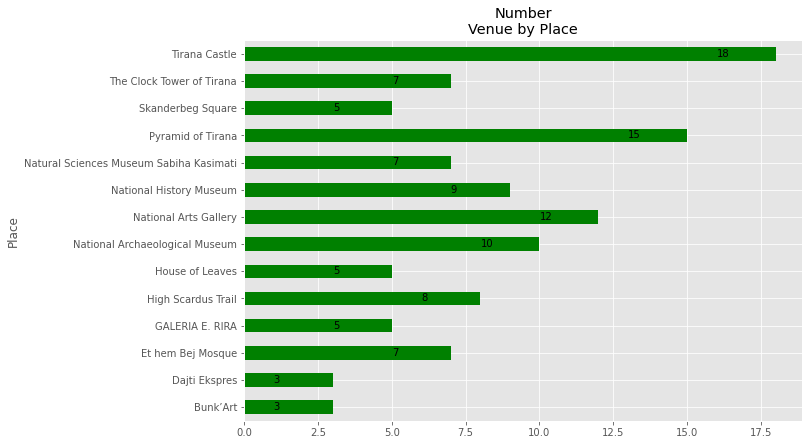

In [255]:
df_trn.plot(kind='barh', figsize=(10,7), color='green')

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number\nVenue by Place') # add title to the plot

for index, value in enumerate(df_trn): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 2, index -0.10), color='black')
    
plt.show()

## How many unique categories can be curated from all the returned venues?


In [256]:
print('There are {} uniques categories.'.format(len(Tirana_data_venues['Venue Category'].unique())))
print(Tirana_data_venues['Venue Category'].unique() )

There are 38 uniques categories.
['Plaza' 'History Museum' 'Historic Site' 'Café' 'Concert Hall'
 'Rock Club' 'Hotel' 'Pizza Place' 'Italian Restaurant' 'Restaurant'
 'Cocktail Bar' 'Nightclub' 'Art Gallery' 'Lounge' 'Pub' 'Theater'
 'Japanese Restaurant' 'Movie Theater' 'Bar' 'Garden' 'Cable Car'
 'Mediterranean Restaurant' 'Bistro' 'Shopping Mall'
 'Fast Food Restaurant' 'Electronics Store' 'Coffee Shop'
 'Seafood Restaurant' 'Bridal Shop' 'Multiplex' 'Soccer Stadium'
 'Wine Bar' 'Steakhouse' 'Hostel' 'Turkish Restaurant'
 'Modern European Restaurant' 'Diner' 'Supermarket']


## We can analyse each venue in a different way.


In [257]:
# one hot encoding
Tirana_oh = pd.get_dummies(Tirana_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
Tirana_oh['Place'] = Tirana_data_venues['Place'] 

# move lieux column to the first column
fixed_columns = [Tirana_oh.columns[-1]] + list(Tirana_oh.columns[:-1])
Tirana_oh = Tirana_oh[fixed_columns]

Tirana_oh

,Place,Art Gallery,Bar,Bistro,Bridal Shop,Cable Car,Café,Cocktail Bar,Coffee Shop,Concert Hall,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,History Museum,Hostel,Hotel,Italian Restaurant,Japanese Restaurant,Lounge,Mediterranean Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Nightclub,Pizza Place,Plaza,Pub,Restaurant,Rock Club,Seafood Restaurant,Shopping Mall,Soccer Stadium,Steakhouse,Supermarket,Theater,Turkish Restaurant,Wine Bar
0,Skanderbeg Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Skanderbeg Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Skanderbeg Square,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Skanderbeg Square,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Skanderbeg Square,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,National History Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,National History Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,National History Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,National History Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,National History Museum,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [258]:
## we can group rows by categories!
Tirana_grouped = Tirana_oh.groupby('Place').mean().reset_index()
Tirana_grouped.head()

,Place,Art Gallery,Bar,Bistro,Bridal Shop,Cable Car,Café,Cocktail Bar,Coffee Shop,Concert Hall,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,History Museum,Hostel,Hotel,Italian Restaurant,Japanese Restaurant,Lounge,Mediterranean Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Nightclub,Pizza Place,Plaza,Pub,Restaurant,Rock Club,Seafood Restaurant,Shopping Mall,Soccer Stadium,Steakhouse,Supermarket,Theater,Turkish Restaurant,Wine Bar
0,Bunk’Art,0.0,0.000,0.0,0.0,0.333333,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.333333,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dajti Ekspres,0.0,0.000,0.0,0.0,0.333333,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.333333,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Et hem Bej Mosque,0.0,0.000,0.0,0.0,0.000000,0.142857,0.0,0.00,0.142857,0.0,0.0,0.0,0.0,0.142857,0.142857,0.0,0.142857,0.142857,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GALERIA E. RIRA,0.0,0.000,0.0,0.0,0.000000,0.400000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.200000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2
4,High Scardus Trail,0.0,0.125,0.0,0.0,0.000000,0.375000,0.0,0.25,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [471]:
#15 Top Venues along with the top 15 most common venues and their frequencies, based on the data from Foursqaure.
num_top_venues = 15

for hood in Tirana_grouped['Place']:
    print("----"+hood+"----")
    temp = Tirana_grouped[Tirana_grouped['Place'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('')

----Bunk’Art----
                       venue  freq
0                  Cable Car  0.33
1              Historic Site  0.33
2   Mediterranean Restaurant  0.33
3                Art Gallery  0.00
4                 Restaurant  0.00
5              Movie Theater  0.00
6                  Multiplex  0.00
7                  Nightclub  0.00
8                Pizza Place  0.00
9                      Plaza  0.00
10                       Pub  0.00
11                 Rock Club  0.00
12        Seafood Restaurant  0.00
13             Shopping Mall  0.00
14            Soccer Stadium  0.00

----Dajti Ekspres----
                       venue  freq
0                  Cable Car  0.33
1              Historic Site  0.33
2   Mediterranean Restaurant  0.33
3                Art Gallery  0.00
4                 Restaurant  0.00
5              Movie Theater  0.00
6                  Multiplex  0.00
7                  Nightclub  0.00
8                Pizza Place  0.00
9                      Plaza  0.00
10             

#### We can transform it into a pandas dataframe.

In [477]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [476]:
#Make a list of the top 20 venues by place in ascending order.
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
place_venues_sorted = pd.DataFrame(columns=columns)
place_venues_sorted['Place'] = Tirana_grouped['Place']

for ind in np.arange(Tirana_grouped.shape[0]):
    place_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tirana_grouped.iloc[ind, :], num_top_venues)

place_venues_sorted

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Bunk’Art,Mediterranean Restaurant,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
1,Dajti Ekspres,Mediterranean Restaurant,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
2,Et hem Bej Mosque,Concert Hall,Café,History Museum,Historic Site,Plaza,Italian Restaurant,Hotel,Cocktail Bar,Coffee Shop,Cable Car,Diner,Bridal Shop,Electronics Store,Fast Food Restaurant,Garden,Bistro,Bar,Hostel,Wine Bar,Japanese Restaurant
3,GALERIA E. RIRA,Café,Wine Bar,Steakhouse,Italian Restaurant,Diner,Hostel,History Museum,Historic Site,Garden,Fast Food Restaurant,Electronics Store,Coffee Shop,Concert Hall,Cocktail Bar,Cable Car,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
4,High Scardus Trail,Café,Coffee Shop,Pizza Place,Bar,Lounge,Wine Bar,Hostel,History Museum,Historic Site,Garden,Fast Food Restaurant,Diner,Electronics Store,Italian Restaurant,Concert Hall,Cocktail Bar,Cable Car,Bridal Shop,Bistro,Hotel
5,House of Leaves,Coffee Shop,Theater,History Museum,Bridal Shop,Seafood Restaurant,Diner,Hostel,Historic Site,Garden,Fast Food Restaurant,Electronics Store,Wine Bar,Concert Hall,Italian Restaurant,Cocktail Bar,Café,Cable Car,Bistro,Bar,Hotel
6,National Archaeological Museum,Shopping Mall,Fast Food Restaurant,Multiplex,Soccer Stadium,Café,Cocktail Bar,Plaza,Concert Hall,Wine Bar,History Museum,Historic Site,Garden,Electronics Store,Coffee Shop,Diner,Hotel,Cable Car,Bridal Shop,Bistro,Bar
7,National Arts Gallery,Japanese Restaurant,Pub,Bar,Cocktail Bar,Garden,History Museum,Lounge,Movie Theater,Nightclub,Art Gallery,Restaurant,Theater,Plaza,Bistro,Bridal Shop,Cable Car,Café,Supermarket,Coffee Shop,Concert Hall
8,National History Museum,Plaza,Rock Club,Italian Restaurant,History Museum,Concert Hall,Pizza Place,Restaurant,Hotel,Café,Cocktail Bar,Coffee Shop,Hostel,Cable Car,Bridal Shop,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,Bistro
9,Natural Sciences Museum Sabiha Kasimati,Café,Coffee Shop,Hostel,Restaurant,Turkish Restaurant,Steakhouse,Bridal Shop,Cable Car,Cocktail Bar,Bistro,Hotel,Concert Hall,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,History Museum,Bar,Wine Bar


#### The top 5 venues in Tirana are: 'Bar, Café, Cocktail Bar, Lounge, Coffe Shop".

In [480]:
#Kmeans will help cluster the 15 places in different  clusters based on their geolocalisation (lat, lng). 

from warnings import filterwarnings
filterwarnings('ignore')

kmeans = cluster.KMeans(4)
kmeans.fit(df_tir[['Longitude', 'Latitude']])
labels = kmeans.labels_
Tirana_grouped_clustering = Tirana_grouped.drop('Place', 1)


# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]


array([2, 2, 2, 3, 2, 1, 2, 2, 1, 3, 2, 0, 0, 2, 2], dtype=int32)

In [481]:
#Centroids of the 4 different clusters.
kmeans.cluster_centers_

array([[19.808     , 41.3228    ],
       [19.86085   , 41.35115   ],
       [19.81876667, 41.32701111],
       [19.82355   , 41.31535   ]])

In [482]:
#Let's create a new dataframe that includes the cluster as well as the top 20 venues for each Place.
Tirana_merged = df_tir

# add clustering labels
Tirana_merged['Cluster Labels'] = kmeans.labels_

Tirana_merged = Tirana_merged.join(place_venues_sorted.set_index('Place'), on='Places')
Tirana_merged 
# check the last columns!

,Places,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Skanderbeg Square,41.3277,19.8186,2,Concert Hall,History Museum,Historic Site,Café,Plaza,Diner,Hostel,Garden,Fast Food Restaurant,Electronics Store,Wine Bar,Italian Restaurant,Coffee Shop,Cocktail Bar,Cable Car,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
1,National History Museum,41.3294,19.8174,2,Plaza,Rock Club,Italian Restaurant,History Museum,Concert Hall,Pizza Place,Restaurant,Hotel,Café,Cocktail Bar,Coffee Shop,Hostel,Cable Car,Bridal Shop,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,Bistro
2,Et hem Bej Mosque,41.3278,19.8194,2,Concert Hall,Café,History Museum,Historic Site,Plaza,Italian Restaurant,Hotel,Cocktail Bar,Coffee Shop,Cable Car,Diner,Bridal Shop,Electronics Store,Fast Food Restaurant,Garden,Bistro,Bar,Hostel,Wine Bar,Japanese Restaurant
3,Grand Park of Tirana,41.3123,19.8251,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,National Arts Gallery,41.3256,19.8202,2,Japanese Restaurant,Pub,Bar,Cocktail Bar,Garden,History Museum,Lounge,Movie Theater,Nightclub,Art Gallery,Restaurant,Theater,Plaza,Bistro,Bridal Shop,Cable Car,Café,Supermarket,Coffee Shop,Concert Hall
5,Bunk’Art,41.3516,19.8608,1,Mediterranean Restaurant,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
6,Tirana Castle,41.3264,19.8221,2,Bar,Hotel,Japanese Restaurant,Pub,Italian Restaurant,Lounge,Fast Food Restaurant,Electronics Store,Movie Theater,Nightclub,Coffee Shop,Restaurant,Cocktail Bar,Café,Shopping Mall,Bistro,History Museum,Concert Hall,Diner,Cable Car
7,House of Leaves,41.3267,19.8164,2,Coffee Shop,Theater,History Museum,Bridal Shop,Seafood Restaurant,Diner,Hostel,Historic Site,Garden,Fast Food Restaurant,Electronics Store,Wine Bar,Concert Hall,Italian Restaurant,Cocktail Bar,Café,Cable Car,Bistro,Bar,Hotel
8,Dajti Ekspres,41.3507,19.8609,1,Mediterranean Restaurant,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
9,National Archaeological Museum,41.3184,19.8220,3,Shopping Mall,Fast Food Restaurant,Multiplex,Soccer Stadium,Café,Cocktail Bar,Plaza,Concert Hall,Wine Bar,History Museum,Historic Site,Garden,Electronics Store,Coffee Shop,Diner,Hotel,Cable Car,Bridal Shop,Bistro,Bar


In [483]:
#For Grand Park of Tirana there is no data. We drop the line and replace the **NaN** by **0**.
Tirana_merged1=Tirana_merged.replace(np.nan, 0)
Tirana_merged1

,Places,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Skanderbeg Square,41.3277,19.8186,2,Concert Hall,History Museum,Historic Site,Café,Plaza,Diner,Hostel,Garden,Fast Food Restaurant,Electronics Store,Wine Bar,Italian Restaurant,Coffee Shop,Cocktail Bar,Cable Car,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
1,National History Museum,41.3294,19.8174,2,Plaza,Rock Club,Italian Restaurant,History Museum,Concert Hall,Pizza Place,Restaurant,Hotel,Café,Cocktail Bar,Coffee Shop,Hostel,Cable Car,Bridal Shop,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,Bistro
2,Et hem Bej Mosque,41.3278,19.8194,2,Concert Hall,Café,History Museum,Historic Site,Plaza,Italian Restaurant,Hotel,Cocktail Bar,Coffee Shop,Cable Car,Diner,Bridal Shop,Electronics Store,Fast Food Restaurant,Garden,Bistro,Bar,Hostel,Wine Bar,Japanese Restaurant
3,Grand Park of Tirana,41.3123,19.8251,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,National Arts Gallery,41.3256,19.8202,2,Japanese Restaurant,Pub,Bar,Cocktail Bar,Garden,History Museum,Lounge,Movie Theater,Nightclub,Art Gallery,Restaurant,Theater,Plaza,Bistro,Bridal Shop,Cable Car,Café,Supermarket,Coffee Shop,Concert Hall
5,Bunk’Art,41.3516,19.8608,1,Mediterranean Restaurant,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
6,Tirana Castle,41.3264,19.8221,2,Bar,Hotel,Japanese Restaurant,Pub,Italian Restaurant,Lounge,Fast Food Restaurant,Electronics Store,Movie Theater,Nightclub,Coffee Shop,Restaurant,Cocktail Bar,Café,Shopping Mall,Bistro,History Museum,Concert Hall,Diner,Cable Car
7,House of Leaves,41.3267,19.8164,2,Coffee Shop,Theater,History Museum,Bridal Shop,Seafood Restaurant,Diner,Hostel,Historic Site,Garden,Fast Food Restaurant,Electronics Store,Wine Bar,Concert Hall,Italian Restaurant,Cocktail Bar,Café,Cable Car,Bistro,Bar,Hotel
8,Dajti Ekspres,41.3507,19.8609,1,Mediterranean Restaurant,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
9,National Archaeological Museum,41.3184,19.8220,3,Shopping Mall,Fast Food Restaurant,Multiplex,Soccer Stadium,Café,Cocktail Bar,Plaza,Concert Hall,Wine Bar,History Museum,Historic Site,Garden,Electronics Store,Coffee Shop,Diner,Hotel,Cable Car,Bridal Shop,Bistro,Bar


In [484]:
# create map with the 4 clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13.)
center=[41.3255843, 19.814439]
kclusters= 4
# set color scheme for the clusters

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tirana_merged['Latitude'], Tirana_merged['Longitude'], Tirana_merged['Places'], Tirana_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

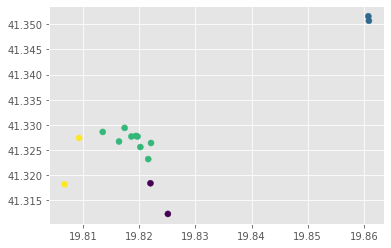

In [485]:
# K-means clustering based on longitude-latitude, showing how the places are groupes.
from sklearn import cluster
kmeans = cluster.KMeans(4)
kmeans.fit(df_tir[['Longitude', 'Latitude']])
labels = kmeans.labels_
plt.scatter(df_tir['Longitude'], df_tir['Latitude'], c=labels)
plt.show()

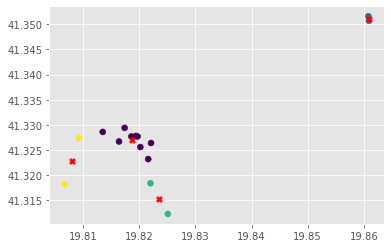

In [286]:
# K-means clustering based on longitude-latitude with centroids for each cluster.
from sklearn import cluster
Kclusters= 4
kmeans.fit(df_tir[['Longitude', 'Latitude']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df_tir['Longitude'], df_tir['Latitude'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', c='red')
plt.show()

In [449]:
# Cluster 0
Tirana_merged1.loc[Tirana_merged1['Cluster Labels'] == 0, Tirana_merged1.columns[[0] + list(range(5, Tirana_merged1.shape[1]))]]


,Places,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Skanderbeg Square,History Museum,Historic Site,Café,Plaza,Diner,Hostel,Garden,Fast Food Restaurant,Electronics Store,Wine Bar,Italian Restaurant,Coffee Shop,Cocktail Bar,Cable Car,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
1,National History Museum,Rock Club,Italian Restaurant,History Museum,Concert Hall,Pizza Place,Restaurant,Hotel,Café,Cocktail Bar,Coffee Shop,Hostel,Cable Car,Bridal Shop,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,Bistro
2,Et hem Bej Mosque,Café,History Museum,Historic Site,Plaza,Italian Restaurant,Hotel,Cocktail Bar,Coffee Shop,Cable Car,Diner,Bridal Shop,Electronics Store,Fast Food Restaurant,Garden,Bistro,Bar,Hostel,Wine Bar,Japanese Restaurant
4,National Arts Gallery,Pub,Bar,Cocktail Bar,Garden,History Museum,Lounge,Movie Theater,Nightclub,Art Gallery,Restaurant,Theater,Plaza,Bistro,Bridal Shop,Cable Car,Café,Supermarket,Coffee Shop,Concert Hall
6,Tirana Castle,Hotel,Japanese Restaurant,Pub,Italian Restaurant,Lounge,Fast Food Restaurant,Electronics Store,Movie Theater,Nightclub,Coffee Shop,Restaurant,Cocktail Bar,Café,Shopping Mall,Bistro,History Museum,Concert Hall,Diner,Cable Car
7,House of Leaves,Theater,History Museum,Bridal Shop,Seafood Restaurant,Diner,Hostel,Historic Site,Garden,Fast Food Restaurant,Electronics Store,Wine Bar,Concert Hall,Italian Restaurant,Cocktail Bar,Café,Cable Car,Bistro,Bar,Hotel
10,The Clock Tower of Tirana,Café,History Museum,Historic Site,Plaza,Italian Restaurant,Hotel,Cocktail Bar,Coffee Shop,Cable Car,Diner,Bridal Shop,Electronics Store,Fast Food Restaurant,Garden,Bistro,Bar,Hostel,Wine Bar,Japanese Restaurant
14,Pyramid of Tirana,Italian Restaurant,Café,Pub,Hotel,Supermarket,Lounge,Cocktail Bar,Modern European Restaurant,Diner,Electronics Store,Historic Site,Garden,Fast Food Restaurant,Wine Bar,Concert Hall,History Museum,Cable Car,Bridal Shop,Bistro


In [451]:
# Cluster 1
Tirana_merged1.loc[Tirana_merged1['Cluster Labels'] == 1, Tirana_merged1.columns[[0,1] + list(range(5, Tirana_merged1.shape[1]))]]


,Places,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
5,Bunk’Art,41.3516,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
8,Dajti Ekspres,41.3507,Cable Car,Historic Site,Wine Bar,Diner,Hostel,History Museum,Garden,Fast Food Restaurant,Electronics Store,Concert Hall,Italian Restaurant,Coffee Shop,Cocktail Bar,Café,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant


In [350]:
# Cluster 2
Tirana_merged1.loc[Tirana_merged1['Cluster Labels'] == 2, Tirana_merged1.columns[[0,1] + list(range(5, Tirana_merged1.shape[1]))]]


,Places,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
11,GALERIA E. RIRA,41.3182,Wine Bar,Steakhouse,Italian Restaurant,Diner,Hostel,History Museum,Historic Site,Garden,Fast Food Restaurant,Electronics Store,Coffee Shop,Concert Hall,Cocktail Bar,Cable Car,Bridal Shop,Bistro,Bar,Hotel,Japanese Restaurant
12,Natural Sciences Museum Sabiha Kasimati,41.3274,Coffee Shop,Hostel,Restaurant,Turkish Restaurant,Steakhouse,Bridal Shop,Cable Car,Cocktail Bar,Bistro,Hotel,Concert Hall,Diner,Electronics Store,Fast Food Restaurant,Garden,Historic Site,History Museum,Bar,Wine Bar
13,High Scardus Trail,41.3286,Coffee Shop,Pizza Place,Bar,Lounge,Wine Bar,Hostel,History Museum,Historic Site,Garden,Fast Food Restaurant,Diner,Electronics Store,Italian Restaurant,Concert Hall,Cocktail Bar,Cable Car,Bridal Shop,Bistro,Hotel


In [351]:
# Cluster 3
Tirana_merged1.loc[Tirana_merged1['Cluster Labels'] == 3, Tirana_merged1.columns[[0,1] + list(range(5, Tirana_merged1.shape[1]))]]


,Places,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
3,Grand Park of Tirana,41.3123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,National Archaeological Museum,41.3184,Fast Food Restaurant,Multiplex,Soccer Stadium,Café,Cocktail Bar,Plaza,Concert Hall,Wine Bar,History Museum,Historic Site,Garden,Electronics Store,Coffee Shop,Diner,Hotel,Cable Car,Bridal Shop,Bistro,Bar


In [300]:
text = " ".join(review for review in df_tir)
print ("There are {} words in the 'tir dataframe' .".format(len(text)))

There are 40 words in the 'tir dataframe' .


In [301]:
text = " ".join(review for review in Tirana_merged)
print ("There are {} words in the 'Tirana merged dataframe'.".format(len(text)))

There are 491 words in the 'Tirana merged dataframe'.


In [276]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

### Create a wordcloud to see what words are the more recurent in our dataframe (Tirana_merged1). We use the second version of the dataframe, to avoid 'NaN' values to apper in the word cloud.


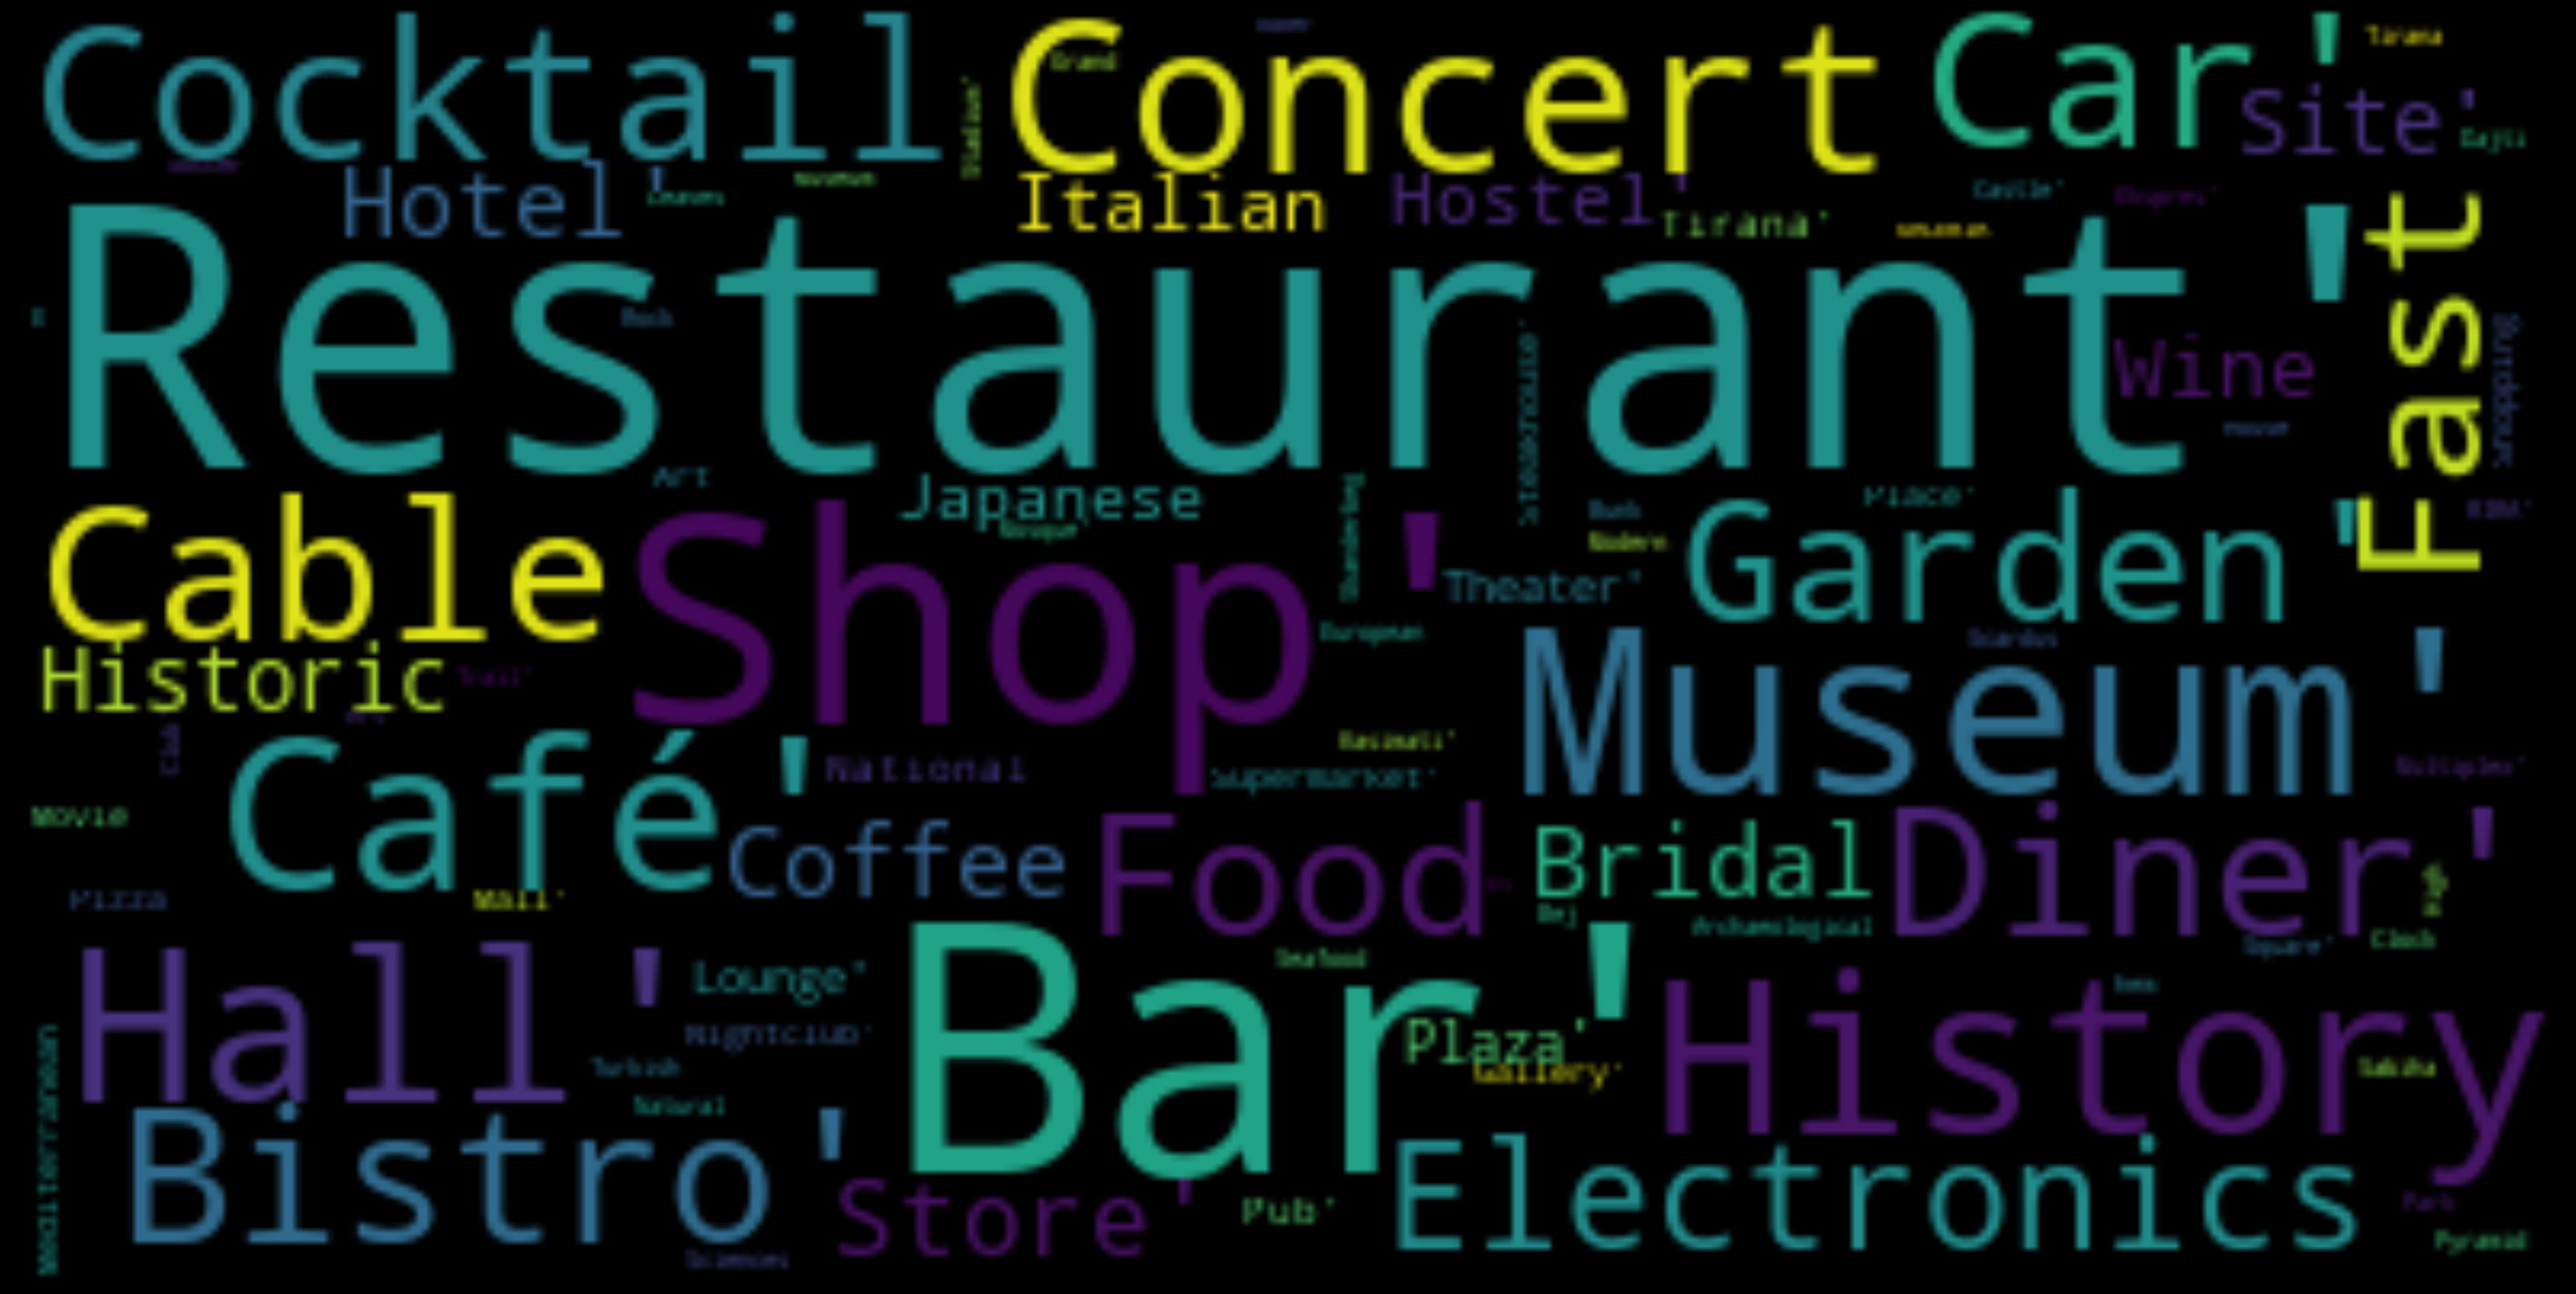

In [418]:
# Create stopword list:
text = Tirana_merged1.values

wordcloud = WordCloud(
    width = 4000,
    height = 3000,
    background_color = "white",
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

wordcloud = WordCloud(collocations=False).generate(str(text))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()